### 1. Importing Packages and Loading Data

In [1]:
import pandas as pd
from zipfile import ZipFile
import os
 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/youngeun/Documents/jupy/projects/churn_pred'

In [3]:
file_path = './iranian+churn+dataset.zip'

with ZipFile(file_path) as z:
    print(z.namelist())

['Customer Churn.csv']


In [4]:
filename = z.namelist()[0]
with ZipFile(file_path).open(filename) as f:
    df = pd.read_csv(f)

#### 1.1 Basic Data Information

In [5]:
df.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

In [6]:
# data size
print(f'num_row: {len(df)}, num_col: {len(df.columns)}')

num_row: 3150, num_col: 14


In [7]:
# Missing Values per Column -> None
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [8]:
# Column Data Types 
df.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

### 2. Splitting Data into Train and Test Sets
- stratified 

In [9]:
X = df.drop(columns = ['Churn']) # dataframe
y = df['Churn'] # series

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=312, stratify=y)

In [11]:
print(f'# of train samples: {len(X_train)}')
print(f'# of test samples: {len(X_test)}')

# of train samples: 2520
# of test samples: 630


### 3. Exploratory Data Analysis
- on training samples only
- each row represents a customer

In [12]:
# Number of unique values in each predictor column
X_train.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1526
Frequency of use            240
Frequency of SMS            383
Distinct Called Numbers      91
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2175
dtype: int64

In [13]:
# num_unique_values < 12 -> categorical variable
categorical_features = ['Complains', 'Charge  Amount', 'Age Group', 'Tariff Plan', 'Status', 'Age']
continuous_features = [c for c in X_train.columns if c not in categorical_features]
continuous_features

['Call  Failure',
 'Subscription  Length',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Customer Value']

In [14]:
# Number of unique values in target column
y_train.nunique()

2

#### 3.1 Descriptive Statistics

##### 3.1.1 Summary Statistics

In [15]:
# continuous features
X_train[continuous_features].describe()

Call  Failure  Subscription  Length  Seconds of Use  Frequency of use  \
count    2520.000000           2520.000000     2520.000000       2520.000000   
mean        7.630159             32.551190     4484.844841         69.465476   
std         7.292540              8.557245     4240.844246         57.975776   
min         0.000000              3.000000        0.000000          0.000000   
25%         1.000000             30.000000     1378.000000         27.000000   
50%         6.000000             35.000000     3011.500000         54.000000   
75%        12.000000             38.000000     6474.750000         95.000000   
max        36.000000             47.000000    17090.000000        255.000000   

       Frequency of SMS  Distinct Called Numbers  Customer Value  
count       2520.000000              2520.000000     2520.000000  
mean          73.889286                23.486508      475.100220  
std          113.431689                17.430672      523.197901  
min            0.000000                 0.000000        0.000000  
25%            6.000000                10.000000      114.480000  
50%           21.000000                21.000000      227.132500  
75%           88.000000                34.000000      793.496250  
max          522.000000                97.000000     2165.280000

In [16]:
# number of zero values for each continuous columns
for c in continuous_features:
    print(f'{c}: {(X_train[c] == 0).sum()}')
'''
통화를 안 쓴 128명 -> 통화 시간 0, 통화 횟수 0, 전화를 건 번호 개수도 0
고객 점수가 0점인 사람은 109 -> 통화 기록이 없는 128 명의 하위 집합일까? 만약 그려면 통화 기록이 없으면서 고객 점수가 0점이 아닌 사람들은 뭐지? 
''';

Call  Failure: 569
Subscription  Length: 0
Seconds of Use: 128
Frequency of use: 128
Frequency of SMS: 480
Distinct Called Numbers: 128
Customer Value: 109


##### 3.1.2 Distribution Check

In [17]:
# categorical features
for c in categorical_features:
    print(c + ' ' + '=' * (20 - len(c)))
    print(pd.DataFrame(
                {'count' : X_train[c].value_counts(),
                'percentage' : round(X_train[c].value_counts(normalize=True) * 100, 2)}))
    print()
'''
- Age와 Age 그룹의 분포는 동일하다. 다만 각 범주별 수치를 절대적으로 가져가냐 아니면 그룹 인덱스로 가져가냐 차이 
- Complains가 없는 사람들이 대부분을 차지. imbalanced event
- Tariff Plan에서도 정액제보다 사용량 기반 요금제가 대부분을 차지. imbalanced event 
- Status에서는 non-active인 고객이 1/4 정도 되는데, non-active가 정확히 뭘 의미하는거지?
- Charge amount는 meta data에 따르면 0~9 범위랬는데 10에 해당되는 행이 5개 있다. 이상치인가 그대로 들고 가도 되려나 
''';

Complains ===========
   count  percentage
0   2328       92.38
1    192        7.62

Charge  Amount ======
    count  percentage
0    1410       55.95
1     500       19.84
2     317       12.58
3     155        6.15
4      60        2.38
5      23        0.91
8      16        0.63
9      13        0.52
7      12        0.48
6       9        0.36
10      5        0.20

Age Group ===========
   count  percentage
3   1119       44.40
2    843       33.45
4    320       12.70
5    143        5.67
1     95        3.77

Tariff Plan =========
   count  percentage
1   2321        92.1
2    199         7.9

Status ==============
   count  percentage
1   1889       74.96
2    631       25.04

Age =================
    count  percentage
30   1119       44.40
25    843       33.45
45    320       12.70
55    143        5.67
15     95        3.77



In [18]:
# y_train distribution
pd.DataFrame(
            {'count' : y_train.value_counts(),
            'percentage' : round(y_train.value_counts(normalize=True) * 100, 2)})

count  percentage
0   2124       84.29
1    396       15.71

#### 3.2 Data visualization

In [19]:
'''for a single cateogrical feature
def get_bar_plot(colname=None, x=True):
    if x is True:
        value_counts = X_train[colname].value_counts().reset_index()
    else:
        colname = 'churn'
        value_counts = y_train.value_counts().reset_index()
    value_counts.columns = [colname, 'count']
    sns.barplot(x=colname, y='count', data=value_counts)
    plt.title(f'Barplot of {colname}')
    plt.show()
''';

##### 3.2.1 Continuous vs. Continuous
- features only

In [20]:
continuous_features

['Call  Failure',
 'Subscription  Length',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Customer Value']

In [22]:
# Call failure vs. others
col_dict = {}
for i in range(len(continuous_features)):
    b = continuous_features[i]
    o = continuous_features[:i] + continuous_features[i+1:]
    col_dict[b] = o

In [23]:
col_dict

{'Call  Failure': ['Subscription  Length',
  'Seconds of Use',
  'Frequency of use',
  'Frequency of SMS',
  'Distinct Called Numbers',
  'Customer Value'],
 'Subscription  Length': ['Call  Failure',
  'Seconds of Use',
  'Frequency of use',
  'Frequency of SMS',
  'Distinct Called Numbers',
  'Customer Value'],
 'Seconds of Use': ['Call  Failure',
  'Subscription  Length',
  'Frequency of use',
  'Frequency of SMS',
  'Distinct Called Numbers',
  'Customer Value'],
 'Frequency of use': ['Call  Failure',
  'Subscription  Length',
  'Seconds of Use',
  'Frequency of SMS',
  'Distinct Called Numbers',
  'Customer Value'],
 'Frequency of SMS': ['Call  Failure',
  'Subscription  Length',
  'Seconds of Use',
  'Frequency of use',
  'Distinct Called Numbers',
  'Customer Value'],
 'Distinct Called Numbers': ['Call  Failure',
  'Subscription  Length',
  'Seconds of Use',
  'Frequency of use',
  'Frequency of SMS',
  'Customer Value'],
 'Customer Value': ['Call  Failure',
  'Subscription  Leng

In [24]:
def get_multi_pairplot(base, others):
    fig, axes = plt.subplots(len(others), 1, figsize=(5, 5 * len(others)))
    for i, var in enumerate(others):
        sns.scatterplot(x=base, y=var, data=df, ax=axes[i])
        axes[i].set_title(f'{base} vs {var}')
    plt.tight_layout()
    plt.show()

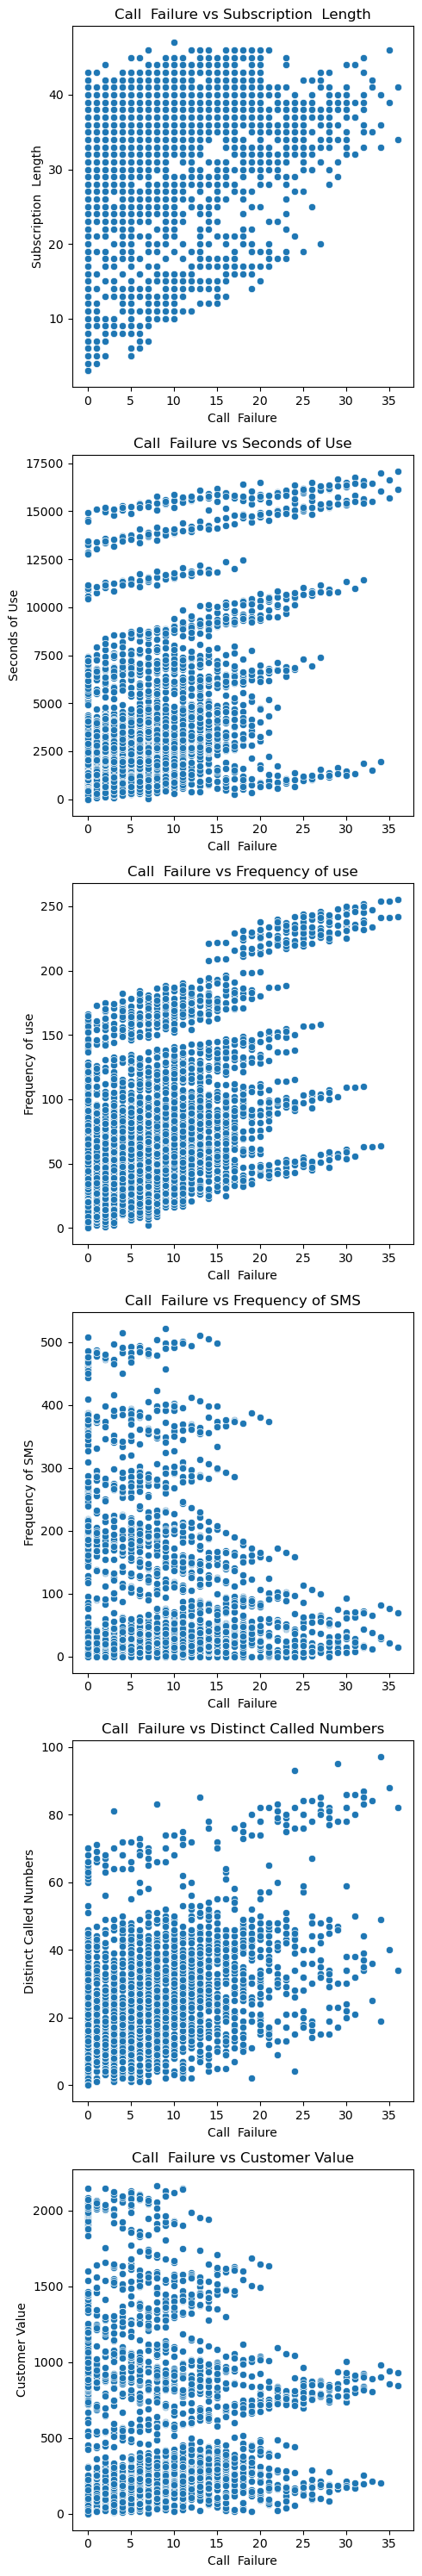

In [25]:
get_multi_pairplot('Call  Failure', col_dict['Call  Failure'])

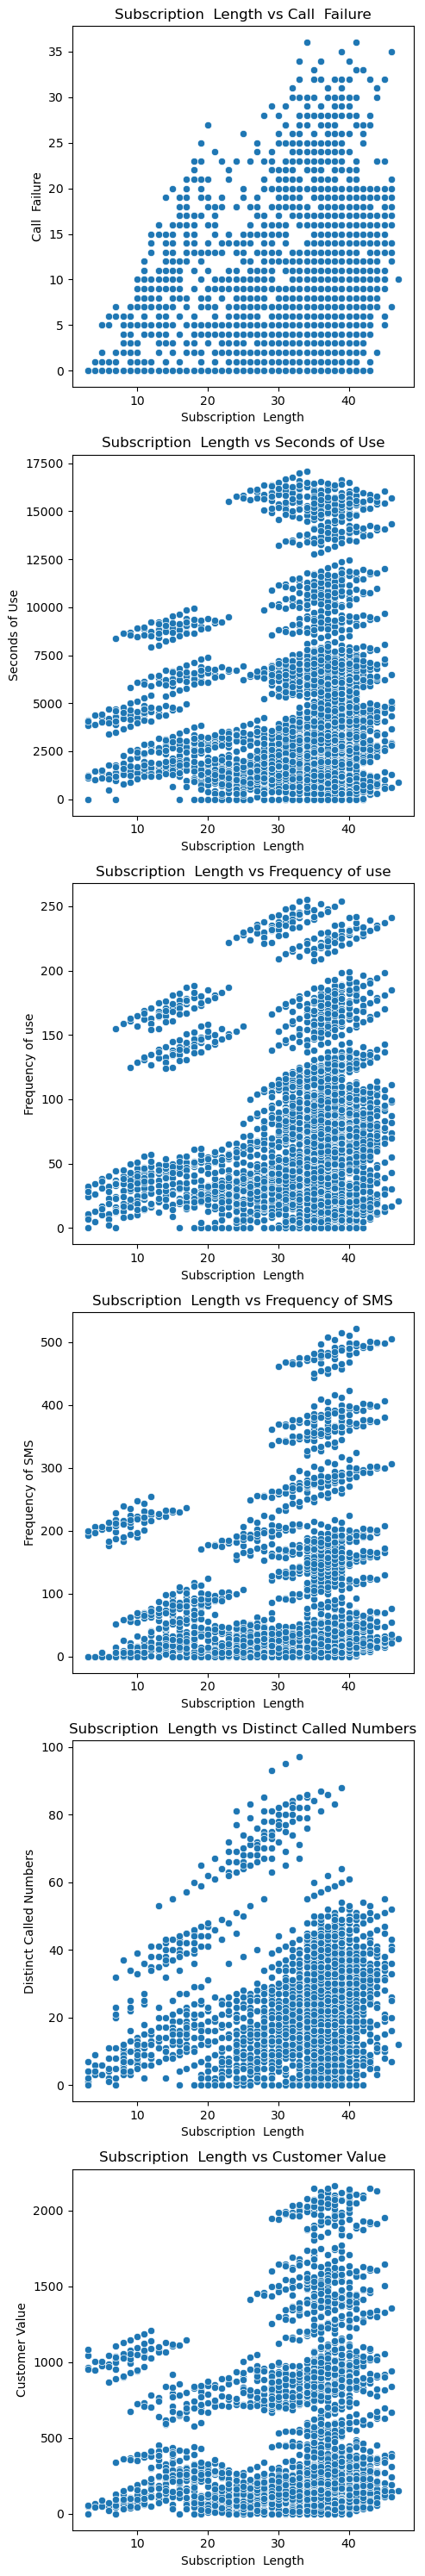

In [26]:
get_multi_pairplot('Subscription  Length', col_dict['Subscription  Length'])

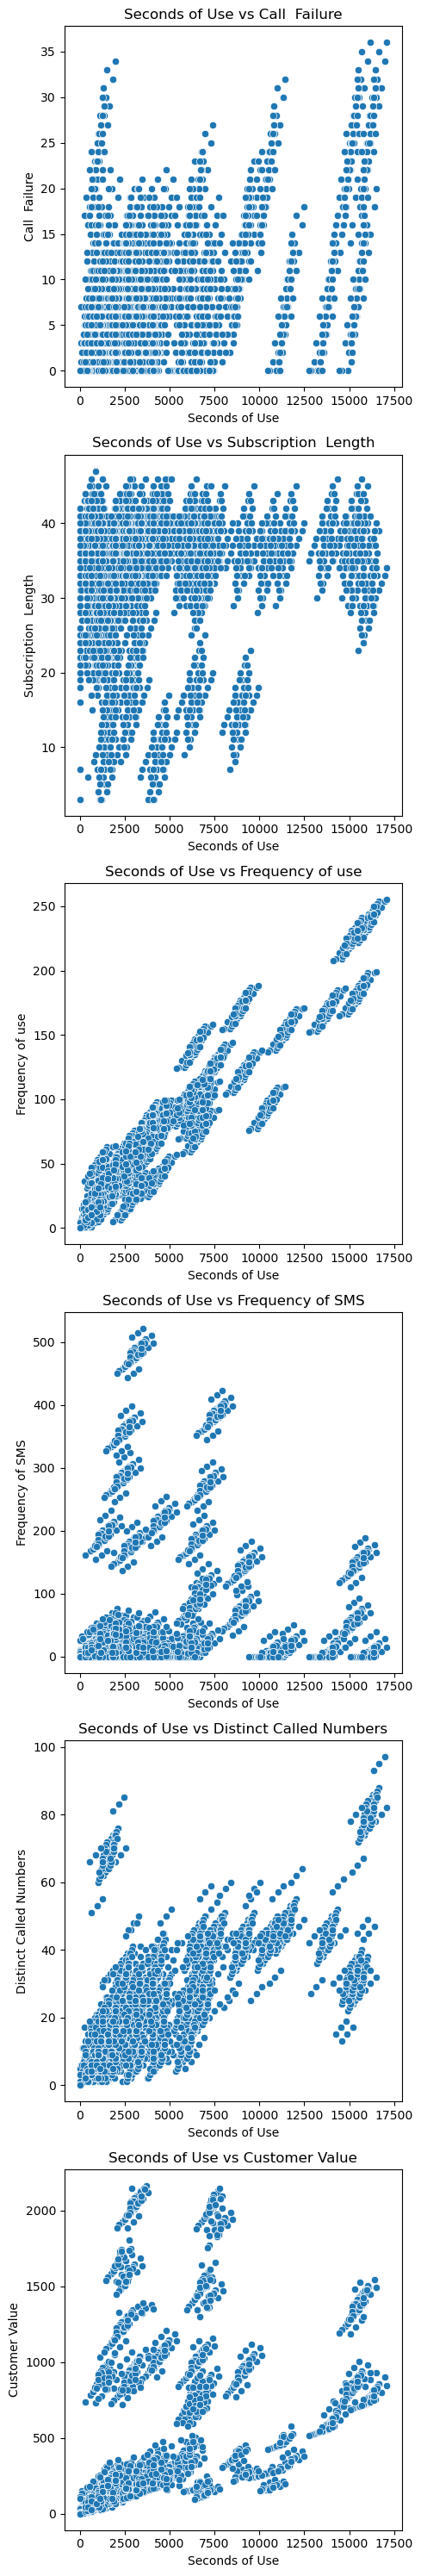

In [27]:
get_multi_pairplot('Seconds of Use', col_dict['Seconds of Use']) # frequency of use와 선형 관계 보임. distinct called numbers랑도 선형 관계 희미하게 보임 

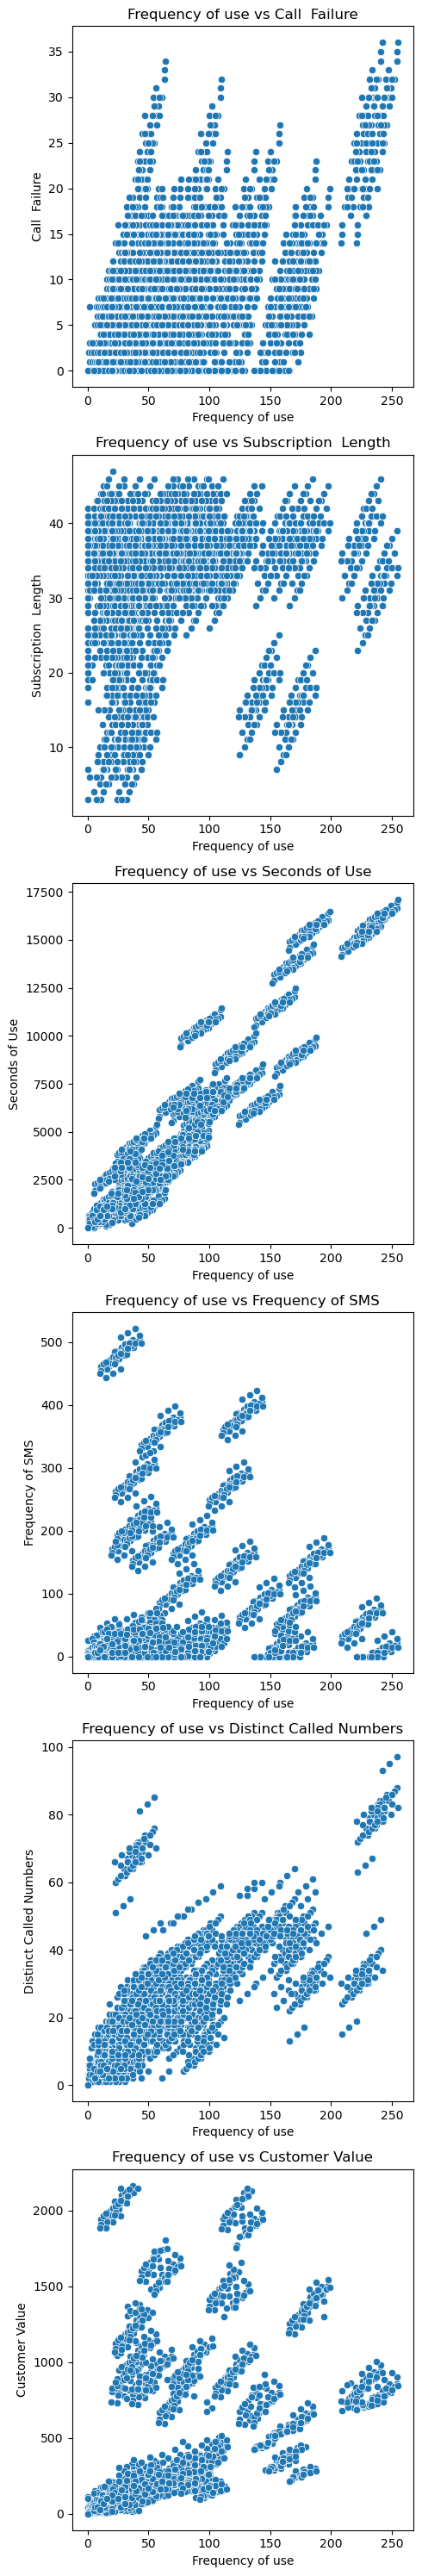

In [28]:
get_multi_pairplot('Frequency of use', col_dict['Frequency of use'])

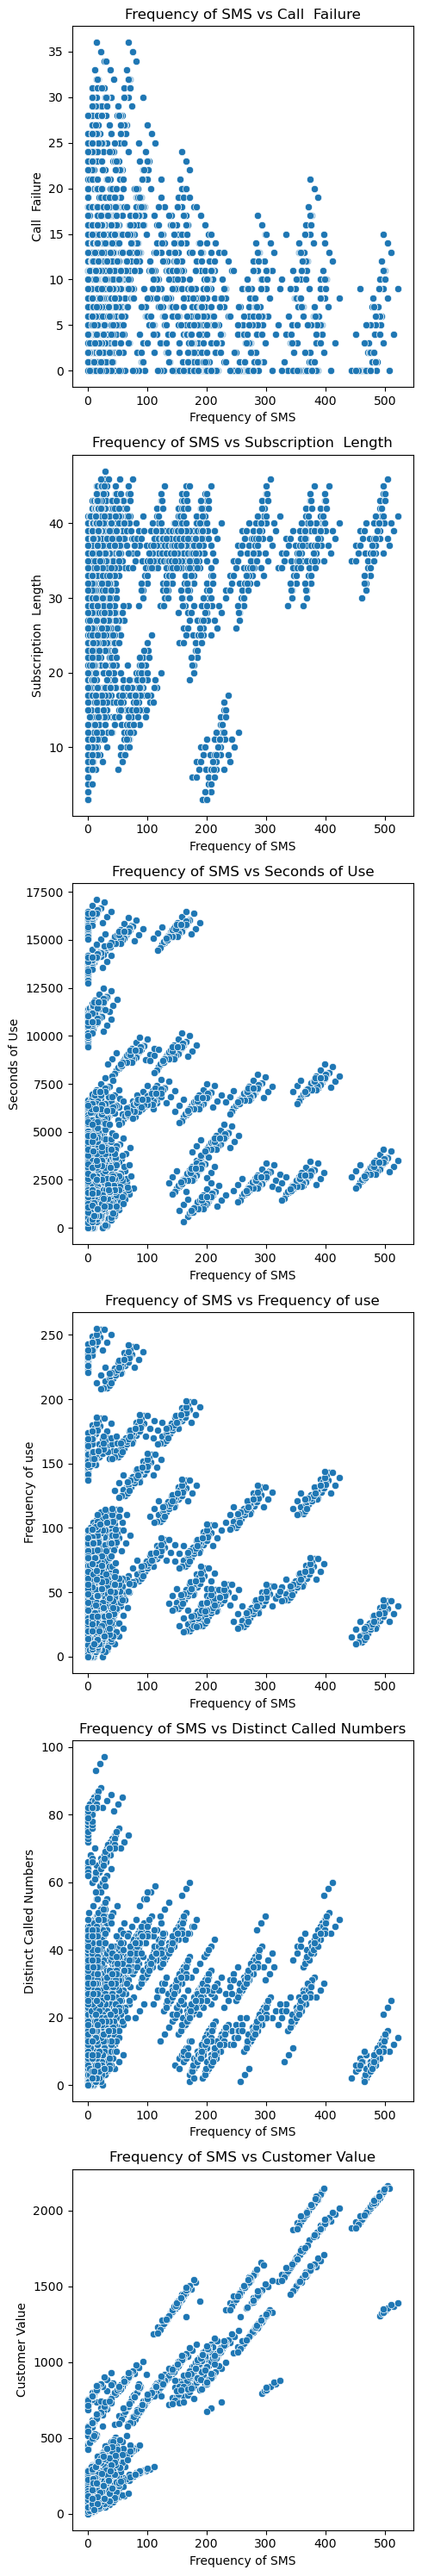

In [29]:
get_multi_pairplot('Frequency of SMS', col_dict['Frequency of SMS']) # Customer Value와 선형 관계

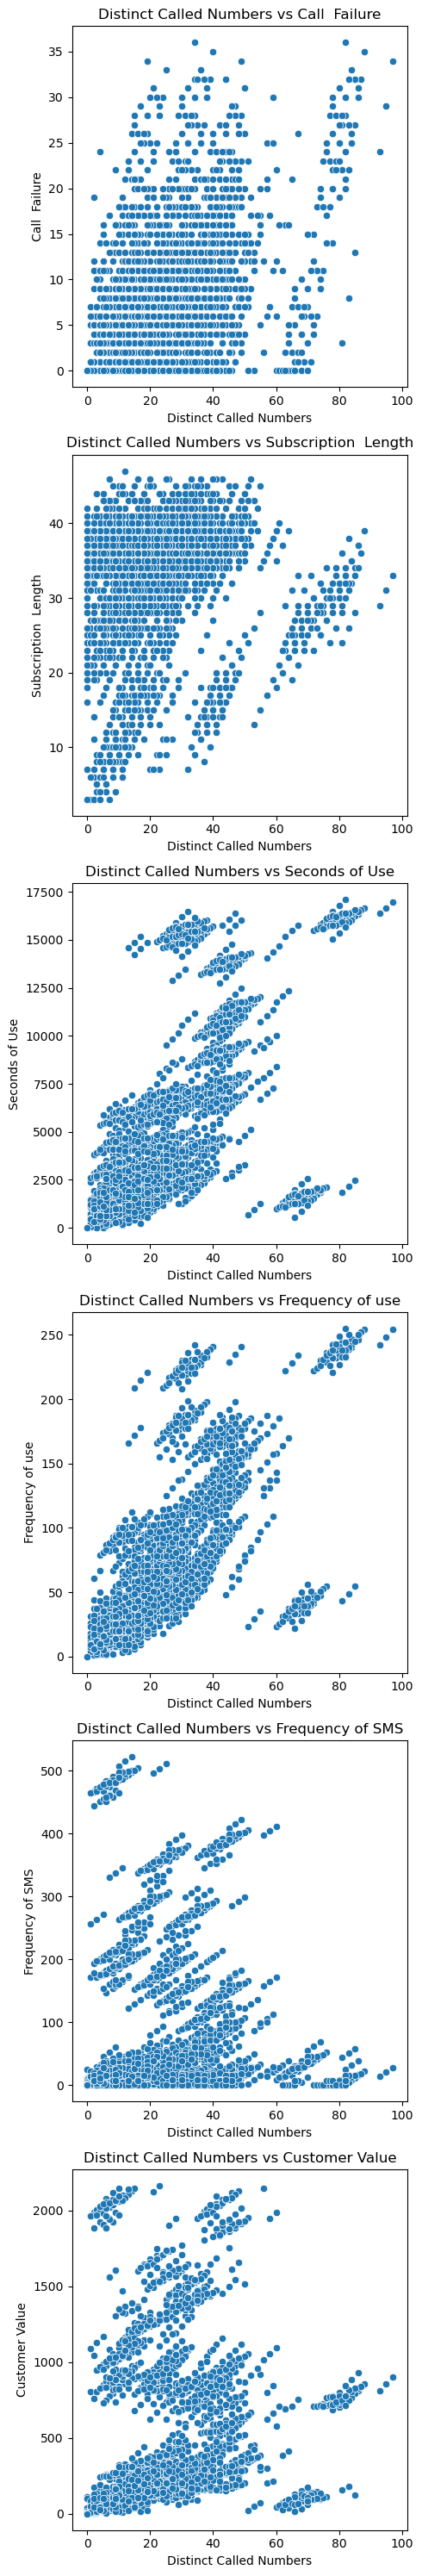

In [30]:
get_multi_pairplot('Distinct Called Numbers', col_dict['Distinct Called Numbers']) # 딱히 번호 수가 많다고 complain이 많아지지는 않았음
# 통화 시간이나 횟수와 선형 관계가 존재하는 것 같음. 특히 frequency 

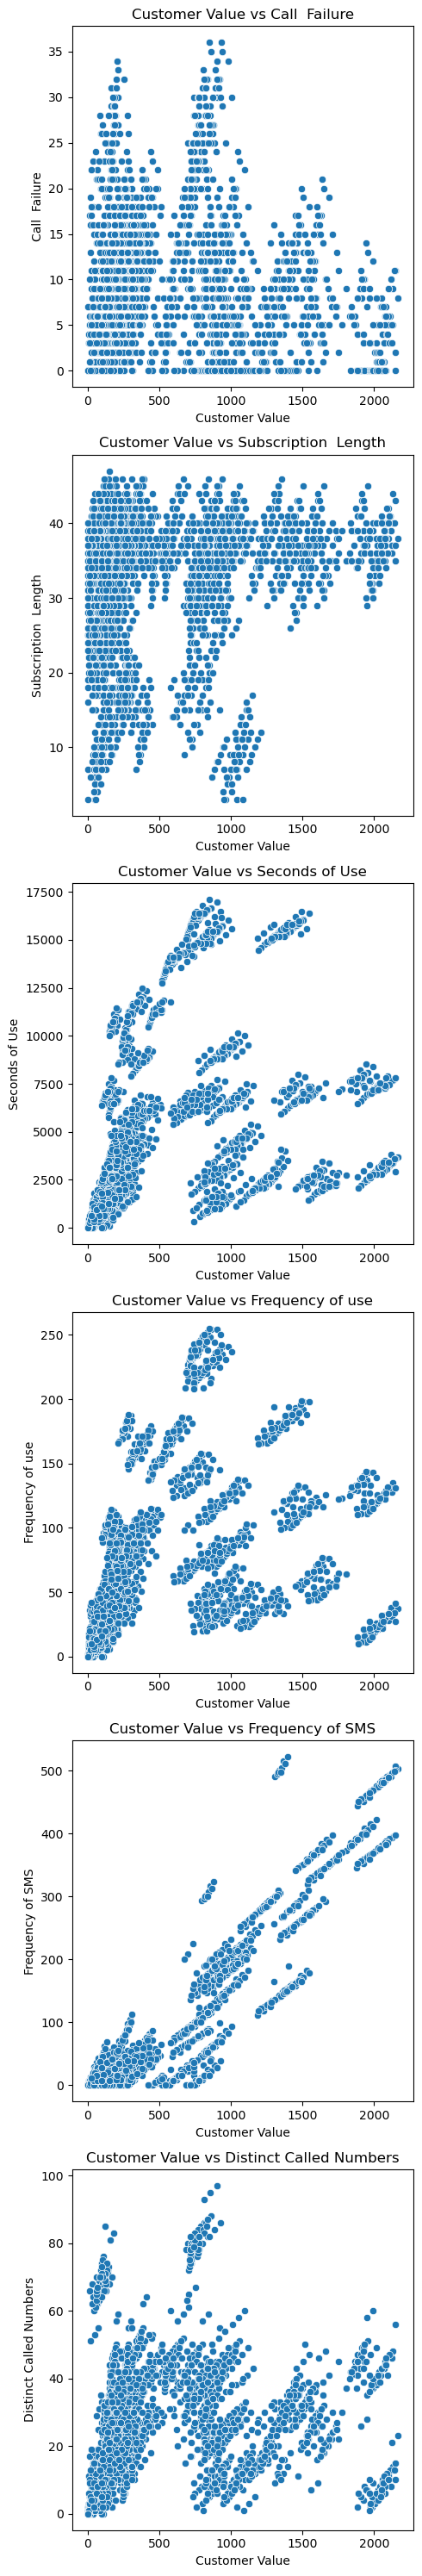

In [31]:
get_multi_pairplot('Customer Value', col_dict['Customer Value'])

##### 3.2.2 Categorical vs. Categorical 
- features only

In [32]:
categorical_features

['Complains', 'Charge  Amount', 'Age Group', 'Tariff Plan', 'Status', 'Age']

In [33]:
def get_cross_tab(var1, var2, norm='all'):
    '''
    normalize='all': 전체 합에 대한 비율 (전체 기준)
	normalize='index': 행(row) 기준 비율 (각 행의 합을 1로 만들어 비율 계산)
	normalize='columns': 열(column) 기준 비율 (각 열의 합을 1로 만들어 비율 계산)
    '''
    if norm:
        print((pd.crosstab(X_train[var1], X_train[var2], normalize=norm) * 100).round(2))
    else:
        print(pd.crosstab(X_train[var1], X_train[var2]))

In [34]:
def draw_heatmap(var1, var2, cross_tab=None):
    if not cross_tab:
        cross_tab = pd.crosstab(X_train[var1], X_train[var2])
    sns.heatmap(cross_tab, annot=True, fmt="d")
    plt.show()

In [35]:
def draw_count_plot(var1, var2):
    plt.figure(figsize=(4, 3))
    sns.countplot(x=var1, hue=var2, data=X_train)
    plt.show()

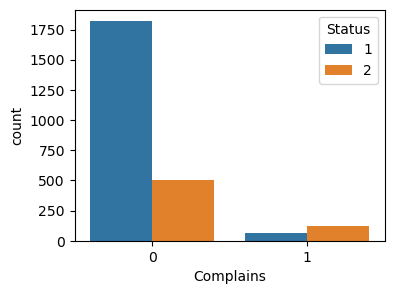

In [36]:
# binary vs binary
draw_count_plot('Complains', 'Status') 

In [37]:
get_cross_tab('Complains', 'Status') # complain이 있는 그룹에서는 non-active 고객이 더 많다

Status         1      2
Complains              
0          72.34  20.04
1           2.62   5.00


- chi2 test

In [38]:
from scipy.stats import chi2_contingency

freq_tab = pd.crosstab(X_train['Status'], X_train['Complains'])
freq_tab

Complains     0    1
Status              
1          1823   66
2           505  126

In [39]:
chi2, p, dof, expected = chi2_contingency(freq_tab)
print(f"Chi-squared: {chi2}, p-value: {p}")

Chi-squared: 180.0549947023449, p-value: 4.714251550371615e-41


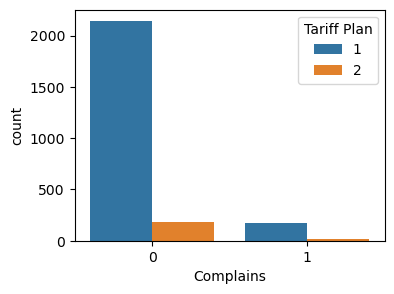

In [40]:
draw_count_plot('Complains', 'Tariff Plan') 

In [41]:
get_cross_tab('Complains', 'Tariff Plan', norm='columns') # 요금제를 뭘 쓰던 complain 비율은 비슷함

Tariff Plan      1      2
Complains                
0            92.46  91.46
1             7.54   8.54


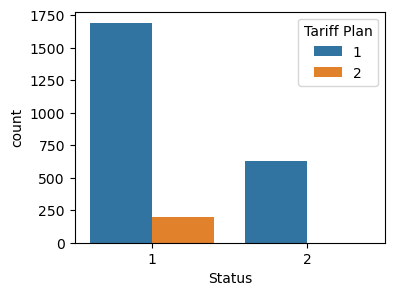

In [42]:
draw_count_plot('Status', 'Tariff Plan') 

In [43]:
get_cross_tab('Status', 'Tariff Plan')

Tariff Plan     1     2
Status                 
1            67.1  7.86
2            25.0  0.04


In [44]:
get_cross_tab('Status', 'Tariff Plan', norm='columns') # 정액제 고객은 거의 다 active 상태. 당연. 쓰지도 않는데 정액제 하면 공돈만 나가는 것 

Tariff Plan      1     2
Status                  
1            72.86  99.5
2            27.14   0.5


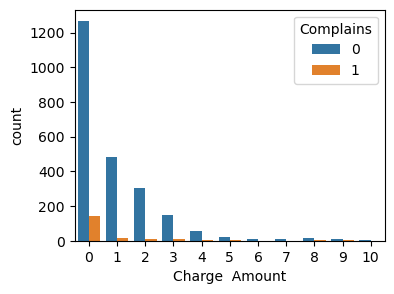

In [45]:
# charge amount vs others
draw_count_plot('Charge  Amount', 'Complains') # 스케일 차이가 커서 비교가 어려움 

In [46]:
ca_freq_tab = pd.crosstab(X_train['Charge  Amount'], X_train['Complains'])
chi2, p, dof, expected = chi2_contingency(ca_freq_tab)
print(f"Chi-squared: {chi2}, p-value: {p}")

Chi-squared: 39.78037302474949, p-value: 1.852192678534865e-05


In [47]:
# charge amount 별 complain proportion
get_cross_tab('Charge  Amount', 'Complains', norm='index')

Complains            0      1
Charge  Amount               
0                89.93  10.07
1                96.60   3.40
2                96.53   3.47
3                94.84   5.16
4                90.00  10.00
5                91.30   8.70
6                88.89  11.11
7               100.00   0.00
8                81.25  18.75
9                84.62  15.38
10              100.00   0.00


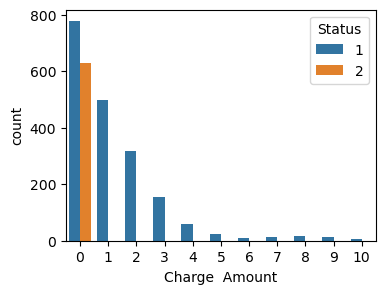

In [48]:
draw_count_plot('Charge  Amount', 'Status')

In [49]:
# charge amount 별 status proportion -> non-active 고객은 모두 가장 낮은 요금제를 내는 그룹에 속해 있다
get_cross_tab('Charge  Amount', 'Status', norm='index')

Status               1      2
Charge  Amount               
0                55.25  44.75
1               100.00   0.00
2               100.00   0.00
3               100.00   0.00
4               100.00   0.00
5               100.00   0.00
6               100.00   0.00
7               100.00   0.00
8               100.00   0.00
9               100.00   0.00
10              100.00   0.00


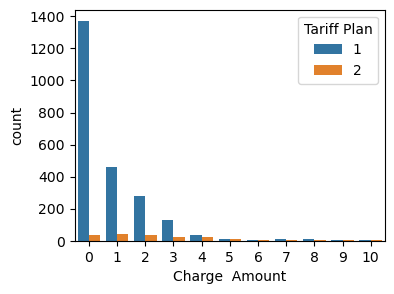

In [50]:
draw_count_plot('Charge  Amount', 'Tariff Plan')

In [51]:
get_cross_tab('Charge  Amount', 'Tariff Plan', norm='index') # 어떤 요금 구간 고객들은 정액제를 더 많이 쓴다(5, 10)

Tariff Plan         1      2
Charge  Amount              
0               97.38   2.62
1               91.80   8.20
2               88.01  11.99
3               83.87  16.13
4               56.67  43.33
5               47.83  52.17
6               55.56  44.44
7               83.33  16.67
8               68.75  31.25
9               53.85  46.15
10              40.00  60.00


In [52]:
get_cross_tab('Charge  Amount', 'Tariff Plan', norm='columns') # 정액제는 pay-as-you-go 대비 적게 내는 그룹 쏠림 현상이 심하지 않다 

Tariff Plan         1      2
Charge  Amount              
0               59.16  18.59
1               19.78  20.60
2               12.02  19.10
3                5.60  12.56
4                1.46  13.07
5                0.47   6.03
6                0.22   2.01
7                0.43   1.01
8                0.47   2.51
9                0.30   3.02
10               0.09   1.51


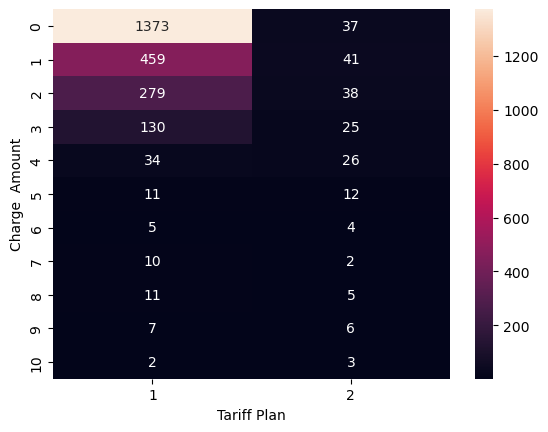

In [53]:
draw_heatmap('Charge  Amount', 'Tariff Plan')

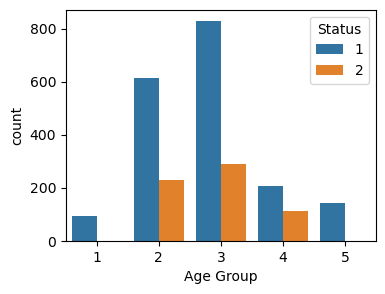

In [54]:
# age group vs. others
draw_count_plot('Age Group', 'Status') # 아주 극소, 극대 연령 그룹은 모두 active 상태 

In [55]:
get_cross_tab('Age Group', 'Status')

Status         1      2
Age Group              
1           3.77   0.00
2          24.40   9.05
3          32.94  11.47
4           8.17   4.52
5           5.67   0.00


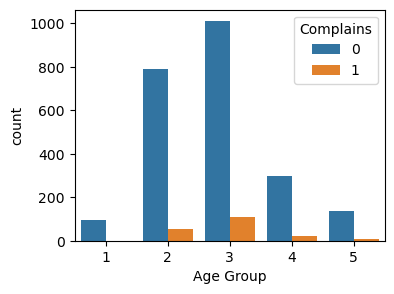

In [56]:
draw_count_plot('Age Group', 'Complains')

In [57]:
get_cross_tab('Age Group', 'Complains', norm='columns')

Complains      0      1
Age Group              
1           4.04   0.52
2          33.85  28.65
3          43.47  55.73
4          12.76  11.98
5           5.88   3.12


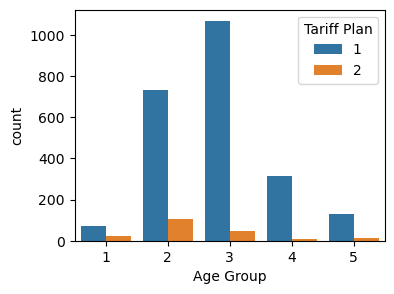

In [58]:
draw_count_plot('Age Group', 'Tariff Plan')

In [59]:
get_cross_tab('Age Group', 'Tariff Plan', norm='index') # 1~4에서는 연령대가 높아질 수록 contractual 비중이 감소하는 경향

Tariff Plan      1      2
Age Group                
1            75.79  24.21
2            87.19  12.81
3            95.62   4.38
4            98.12   1.88
5            90.91   9.09


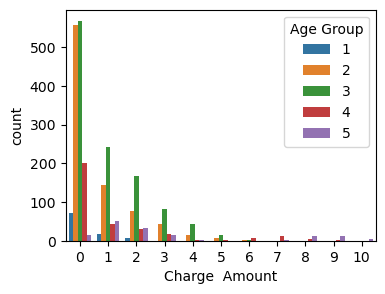

In [60]:
draw_count_plot('Charge  Amount', 'Age Group') # 잘 안 보임

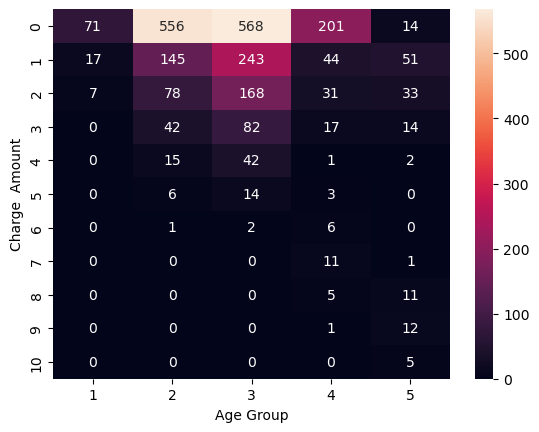

In [61]:
draw_heatmap('Charge  Amount', 'Age Group') # 2~3 그룹에 속하면서 낮은 요금을 지불하는 고객이 다수 

##### 3.2.3 Categorical vs. Continuous
- features only

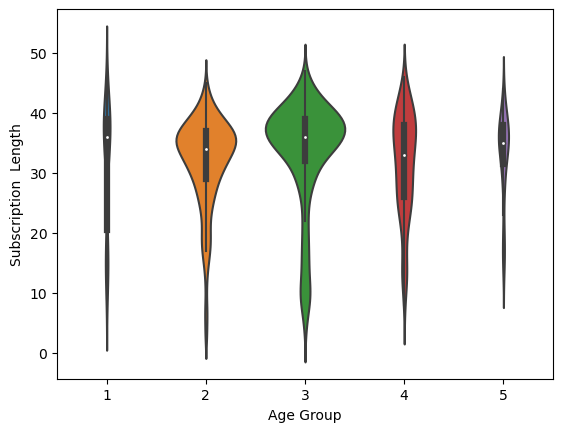

In [91]:
# subscription length
sns.violinplot(x='Age Group', y='Subscription  Length', data=X_train, scale='count');

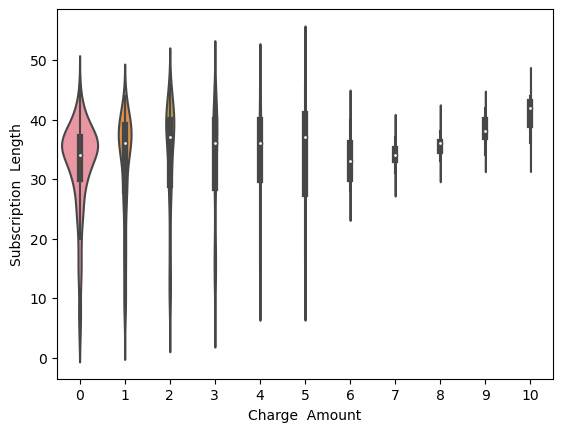

In [92]:
sns.violinplot(x='Charge  Amount', y='Subscription  Length', data=X_train, scale='count');
# 높은 금액을 내는 고객군은 대부분 장기 고객. 6~10 그룹 간에는 선형 관계 있음

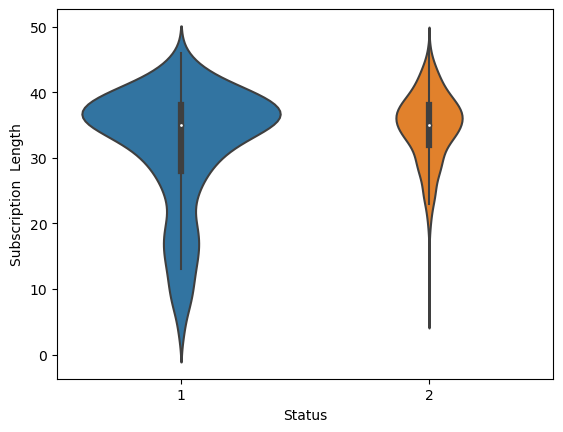

In [93]:
sns.violinplot(x='Status', y='Subscription  Length', data=X_train, scale='count'); 

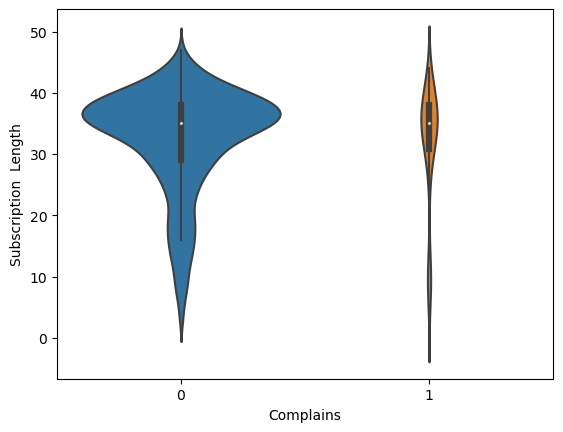

In [94]:
sns.violinplot(x='Complains', y='Subscription  Length', data=X_train,  scale='count'); 

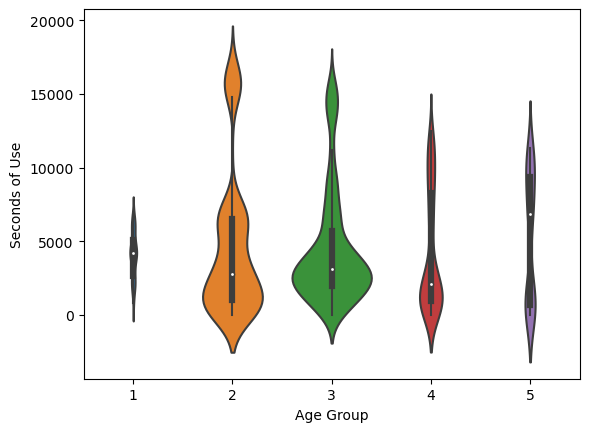

In [95]:
# seconds of use
sns.violinplot(x='Age Group', y='Seconds of Use', data=X_train, scale='count'); 

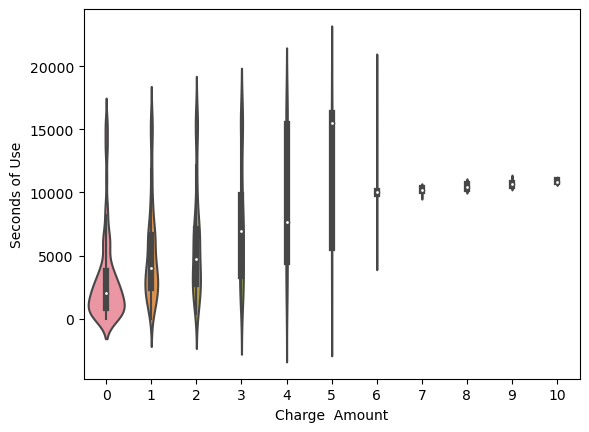

In [96]:
sns.violinplot(x='Charge  Amount', y='Seconds of Use', data=X_train, scale='count');

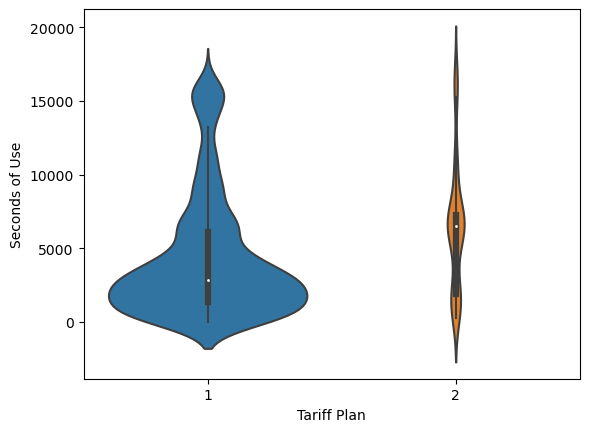

In [97]:
sns.violinplot(x='Tariff Plan', y='Seconds of Use', data=X_train, scale='count'); # 2가 정액제이고, 금액 cap이 있으니까 펑펑 쓰는 경향이 있지 않을까? 평균 더 높음 

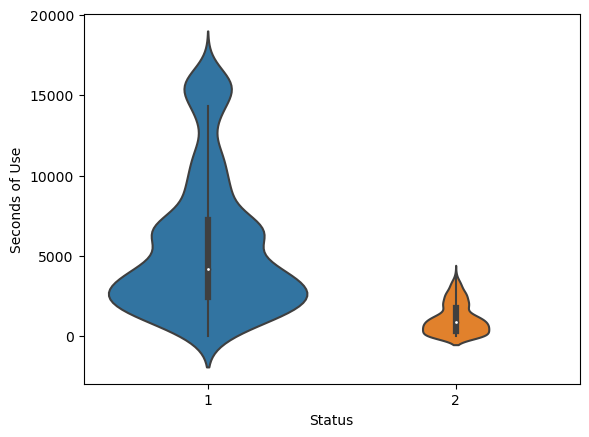

In [98]:
'''
당연히 non-active 고객들의 통화 시간은 0 근처로 짧을 수 밖에. 근데 non-active 면서 통화시간이 있는 사람들은 뭐야? 이상치인가?
'''
sns.violinplot(x='Status', y='Seconds of Use', data=X_train, scale='count'); 

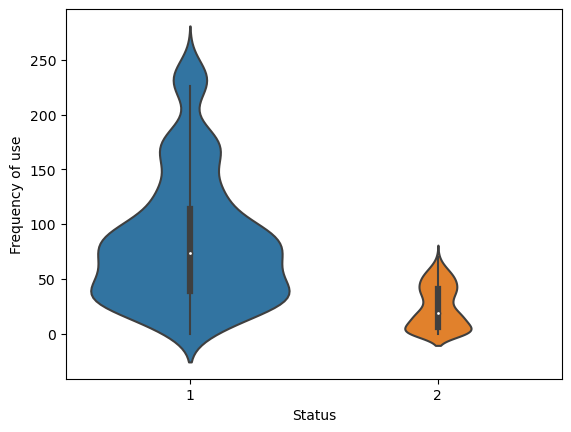

In [100]:
# frequency of use
sns.violinplot(x='Status', y='Frequency of use', data=X_train, scale='count'); # non_active의 평균이 훨씬 낮음

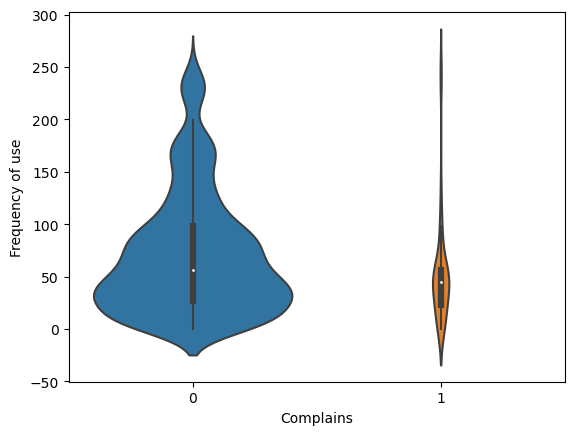

In [101]:
sns.violinplot(x='Complains', y='Frequency of use', data=X_train, scale='count'); # 통화 이용 횟수가 많다고 불평이 더 많지는 않군 

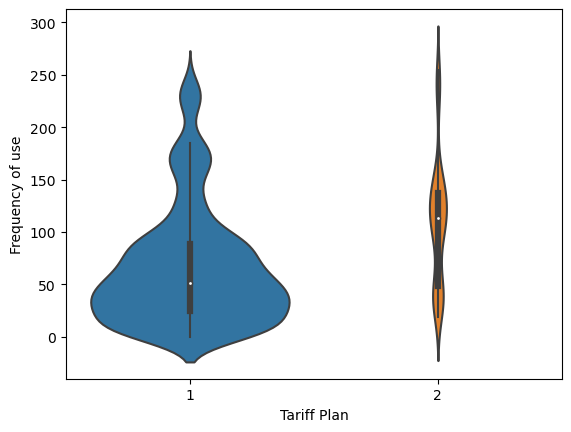

In [102]:
sns.violinplot(x='Tariff Plan', y='Frequency of use', data=X_train, scale='count'); # 정액제 사람들이 더 자주 사용 

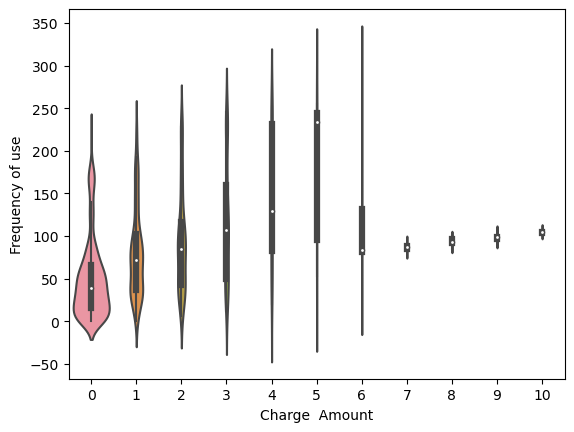

In [103]:
sns.violinplot(x='Charge  Amount', y='Frequency of use', data=X_train, scale='count');

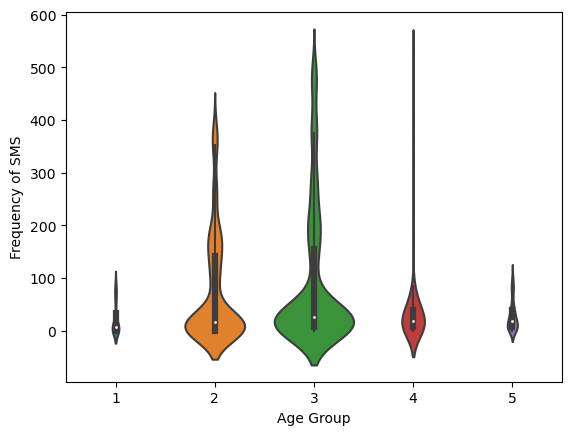

In [104]:
# Frequency of SMS
sns.violinplot(x='Age Group', y='Frequency of SMS', data=X_train, scale='count');

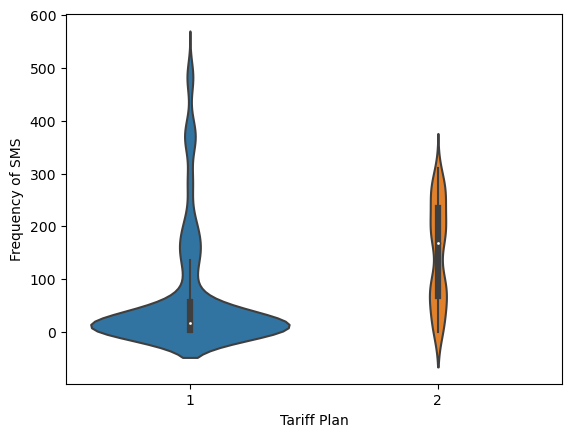

In [105]:
sns.violinplot(x='Tariff Plan', y='Frequency of SMS', data=X_train, scale='count');
# 평균은 정액제에서 높게 나오지만, 극대값은 또 pay-as-you-go 쪽에 있다

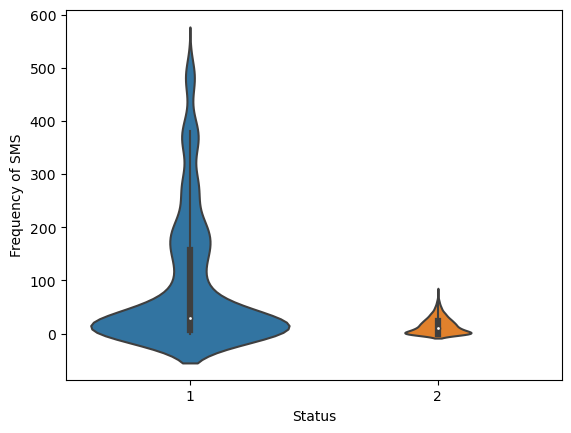

In [106]:
sns.violinplot(x='Status', y='Frequency of SMS', data=X_train, scale='count');
# 중앙값은 큰차이 없어 보이지만, 분포 차이가 크다. non-active 그룹에서는 대부분 0 근처에 모여 있음 

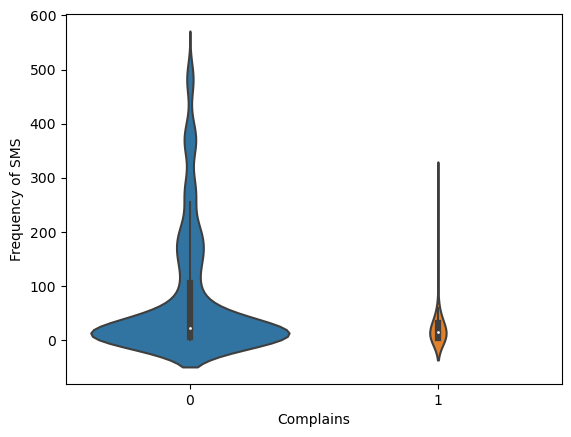

In [107]:
sns.violinplot(x='Complains', y='Frequency of SMS', data=X_train, scale='count');

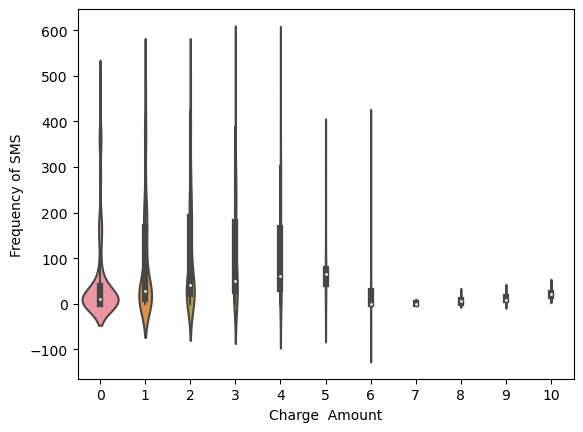

In [108]:
sns.violinplot(x='Charge  Amount', y='Frequency of SMS', data=X_train, scale='count');

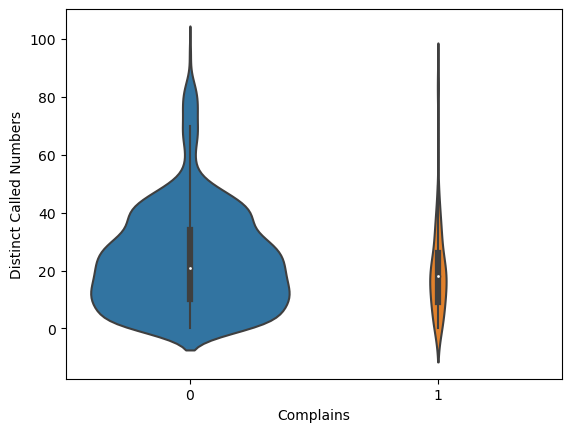

In [109]:
# Distinct called numbers
sns.violinplot(x='Complains', y='Distinct Called Numbers', data=X_train, scale='count');

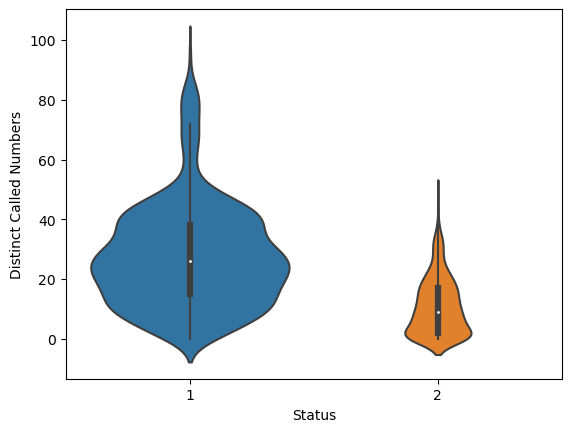

In [110]:
sns.violinplot(x='Status', y='Distinct Called Numbers', data=X_train, scale='count');

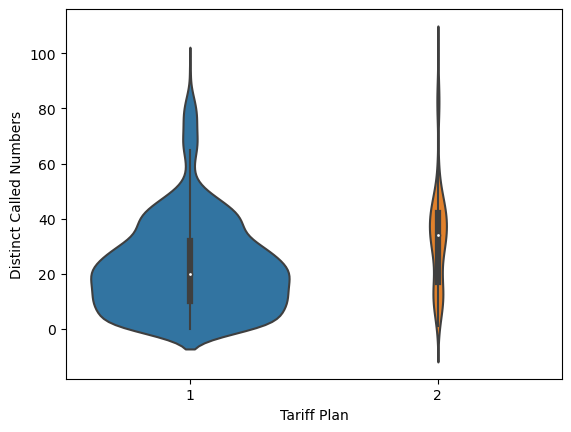

In [111]:
sns.violinplot(x='Tariff Plan', y='Distinct Called Numbers', data=X_train, scale='count'); # 정액제에서 중앙값이 훨씬 높게 나옴 

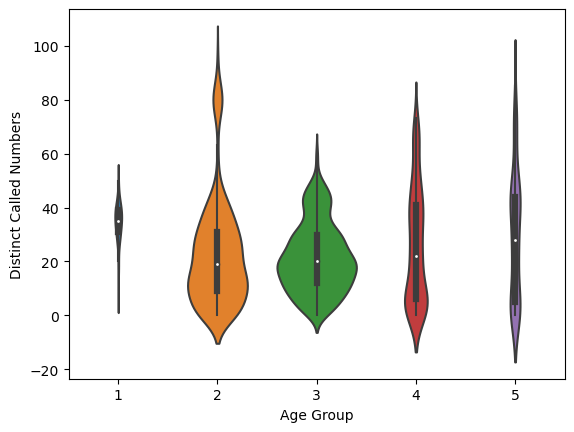

In [112]:
sns.violinplot(x='Age Group', y='Distinct Called Numbers', data=X_train, scale='count'); # 어린 친구들이 연락하는 번호의 범위는 그리 넓지 않을 것

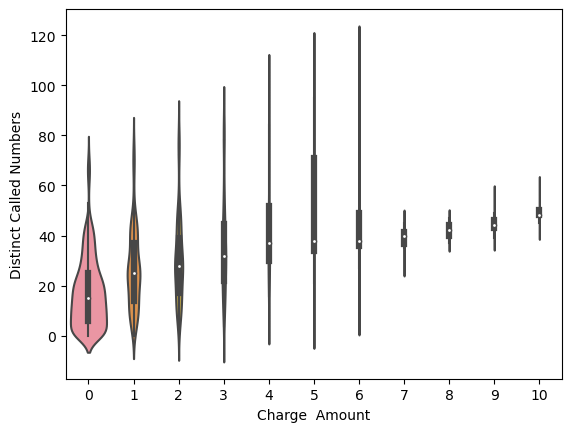

In [113]:
sns.violinplot(x='Charge  Amount', y='Distinct Called Numbers', data=X_train, scale='count'); # 역시 7, 8, 9, 10의 분포는 아주 좁음

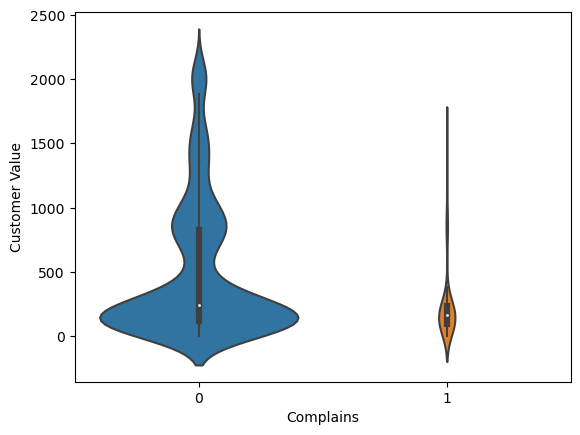

In [114]:
# Customer Value
sns.violinplot(x='Complains', y='Customer Value', data=X_train, scale='count');

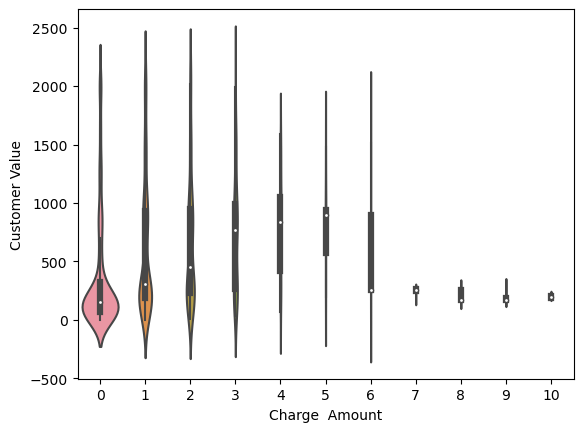

In [115]:
'''
0~5 구간까지는 중앙 값이 올라가는데 6에서 급락. 7~10 사이의 중앙값 변화는 크지 않음
'''
sns.violinplot(x='Charge  Amount', y='Customer Value', data=X_train, scale='count');

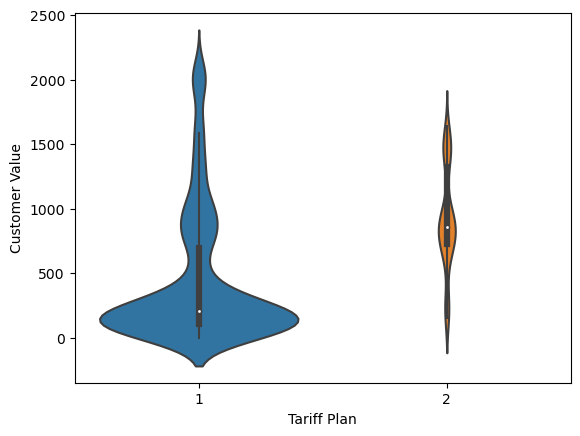

In [116]:
sns.violinplot(x='Tariff Plan', y='Customer Value', data=X_train, scale='count'); # 정액제의 중간값이 훨씬 높게 나옴! 

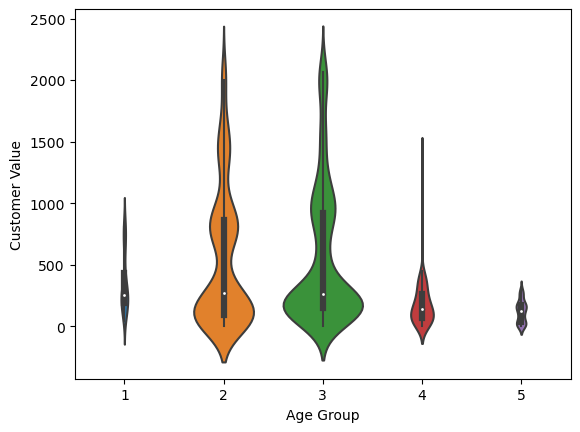

In [117]:
sns.violinplot(x='Age Group', y='Customer Value', data=X_train, scale='count'); # 정액제의 중간값이 훨씬 높게 나옴! 

In [88]:
# 2~5로 갈 수록 감소하는 경향
X_train.groupby('Age Group')['Customer Value'].median()

Age Group
1    251.2950
2    266.8950
3    260.8000
4    142.3375
5    124.9200
Name: Customer Value, dtype: float64

##### 3.2.3 Correlation plot of continuous features

In [90]:
corr = X_train[continous_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

NameError: name 'continous_features' is not defined

#### 3.3 Correlation matrix 

In [ ]:
correlations = X_train.corrwith(y_train).sort_values(ascending=False)
print(correlations)

In [ ]:
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Target Variable')
plt.show()

In [ ]:
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Absolute Correlation of Features with Target Variable')
plt.show()